# ResNet50 (Original Architecture)

## 원본 모델 구조

- **입력 이미지**: `(224, 224, 3)` → ImageNet 표준 입력 크기

- **초기 레이어**:
  - **Conv1**: 7x7 conv, 64 filters, stride 2
  - **MaxPool**: 3x3 pool, stride 2

- **Residual Blocks**:
  1. **Conv2_x** (3개 블록)
     - Bottleneck x 3
     - 출력: 256 채널
  
  2. **Conv3_x** (4개 블록)
     - Bottleneck x 4
     - 출력: 512 채널
  
  3. **Conv4_x** (6개 블록)
     - Bottleneck x 6
     - 출력: 1024 채널
  
  4. **Conv5_x** (3개 블록)
     - Bottleneck x 3
     - 출력: 2048 채널

- **최종 레이어**:
  - Global Average Pooling
  - Dense(1000) for ImageNet

# Modified ResNet50 for CIFAR-10

## 수정 모델 구조

- **입력 이미지**: `(32, 32, 3)` → CIFAR-10 입력 크기

- **초기 레이어**:
  - **Conv1**: 3x3 conv, 64 filters, stride 1, padding same
  - **BatchNorm + ReLU**
  - 출력 크기: `(32, 32, 64)`

- **Residual Blocks**:
  1. **Conv2_x** (3개 블록)
     - Bottleneck x 3
     - 출력 채널: 256
     - 출력 크기: `(32, 32, 256)`
  
  2. **Conv3_x** (4개 블록)
     - Bottleneck x 4
     - 출력 채널: 512
     - 출력 크기: `(16, 16, 512)`
  
  3. **Conv4_x** (6개 블록)
     - Bottleneck x 6
     - 출력 채널: 1024
     - 출력 크기: `(8, 8, 1024)`
  
  4. **Conv5_x** (3개 블록)
     - Bottleneck x 3
     - 출력 채널: 2048
     - 출력 크기: `(4, 4, 2048)`

- **최종 레이어**:
  - Global Average Pooling
  - Dense(10) for CIFAR-10 classes

## Bottleneck 블록 구조 (유지)
- 1x1 conv (차원 감소)
- 3x3 conv (특징 추출)
- 1x1 conv (차원 복원)
- BatchNorm + ReLU
- Skip Connection 추가

# ResNet50 핵심 개념

## 1. Skip Connection (Residual Learning)
- **기본 개념**: F(x) + x
- **목적**: 
  - 그래디언트 소실 문제 해결
  - 더 깊은 네트워크 학습 가능
- **작동 원리**:
  - 레이어가 잔차(residual)만 학습
  - 항등 매핑(identity mapping)이 기본값

## 2. Bottleneck 구조
- **구성**: 1x1 → 3x3 → 1x1 컨볼루션
- **목적**: 계산 효율성 향상
- **작동 원리**:
  1. 1x1 conv: 채널 수 감소 (차원 축소)
  2. 3x3 conv: 주요 특징 추출
  3. 1x1 conv: 채널 수 복원 (차원 복원)

## 3. 깊이에 따른 특징
- **얕은 층**: 단순한 특징 (엣지, 텍스처)
- **깊은 층**: 복잡한 특징 (객체의 부분, 전체)
- **채널 수 증가**: 더 많은 특징 표현 가능

## 4. 성능 향상 요소
- **Batch Normalization**: 
  - 학습 안정화
  - 내부 공변량 변화(internal covariate shift) 감소
- **Global Average Pooling**:
  - 파라미터 수 감소
  - 오버피팅 방지

# CIFAR-10 


In [3]:
import sys
print("Python 경로:", sys.executable)

Python 경로: c:\Users\dongi\anaconda3\envs\tf-gpu\python.exe


In [8]:
# TensorFlow GPU 확인
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# PyTorch GPU 확인
import torch
print("\nPyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No CUDA device")

import os
print("CUDA_PATH:", os.environ.get('CUDA_PATH'))
print("CUDA_HOME:", os.environ.get('CUDA_HOME'))

TensorFlow version: 2.10.1
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

PyTorch version: 2.5.1
CUDA available: True
CUDA device: NVIDIA GeForce RTX 4070 Ti
CUDA_PATH: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2
CUDA_HOME: None


In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np

# 데이터 로드
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터 형태 확인
print("X_train shape:", X_train.shape)  # (50000, 32, 32, 3)
print("X_test shape:", X_test.shape)    # (10000, 32, 32, 3)
print("y_train shape:", y_train.shape)  # (50000, 1)
print("y_test shape:", y_test.shape)    # (10000, 1)

# 데이터 전처리
# 1. 픽셀값을 0-1 사이로 정규화
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 2. 레이블 원-핫 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 클래스 이름 (시각화할 때 사용)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


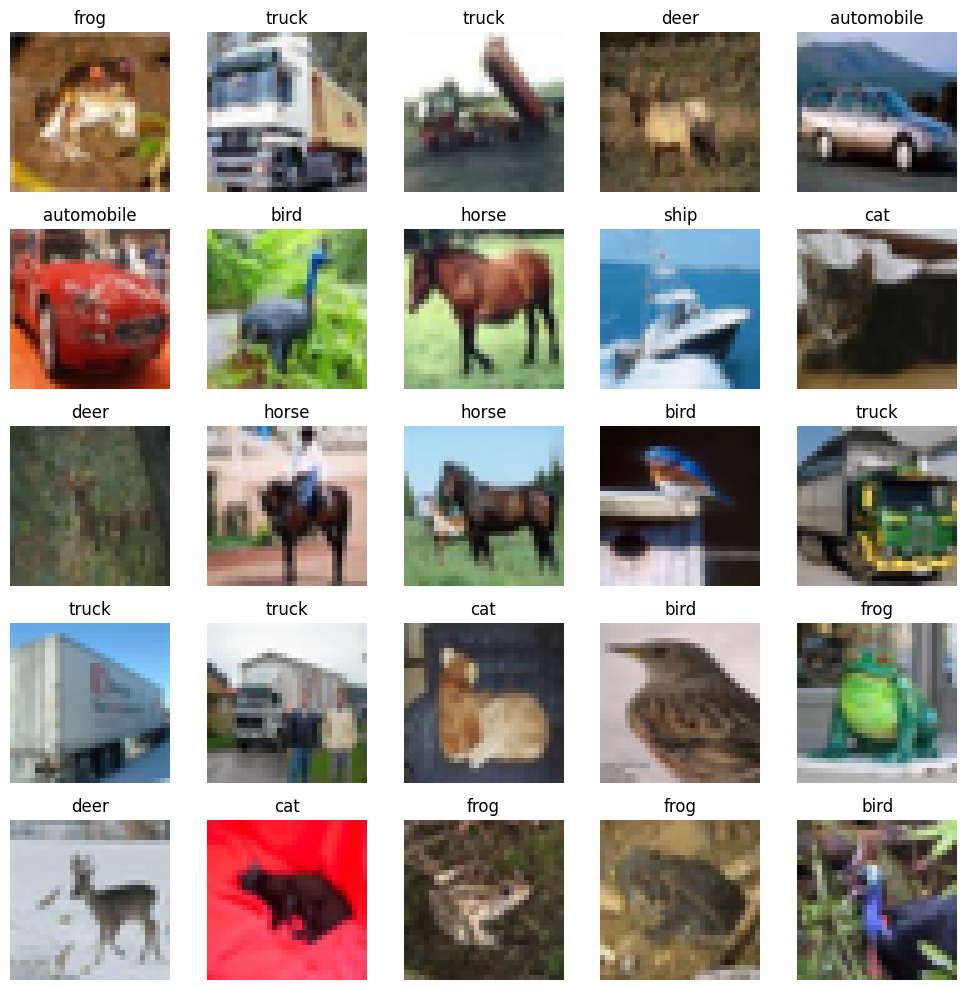

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 모델 구축

In [16]:
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, Dense

def bottleneck_block(x, filters, stride=1, downsample=None):
    # 원본 입력값 저장 (skip connection용)
    identity = x
    
    # Bottleneck 구조 (1x1 → 3x3 → 1x1)
    x = Conv2D(filters, (1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters * 4, (1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization()(x)
    
    # Skip Connection
    if downsample is not None:
        identity = downsample(identity)
    
    x = Add()([x, identity])
    x = Activation('relu')(x)
    
    return x

def make_layer(x, filters, blocks, stride=1):
    # 첫 블록에서 다운샘플링
    downsample = None
    if stride != 1 or x.shape[-1] != filters * 4:
        downsample = lambda x: Conv2D(filters * 4, (1, 1), 
                                    strides=stride, padding='valid')(x)
    
    # 첫 번째 블록
    x = bottleneck_block(x, filters, stride, downsample)
    
    # 나머지 블록들
    for _ in range(1, blocks):
        x = bottleneck_block(x, filters)
    
    return x

In [17]:
def ResNet50(input_shape=(32, 32, 3), num_classes=10):
    # 입력층
    inputs = Input(shape=input_shape)
    
    # 초기 컨볼루션 층 (CIFAR-10용으로 수정)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # ResNet 블록들
    # conv2_x
    x = make_layer(x, filters=64, blocks=3)
    
    # conv3_x
    x = make_layer(x, filters=128, blocks=4, stride=2)
    
    # conv4_x
    x = make_layer(x, filters=256, blocks=6, stride=2)
    
    # conv5_x
    x = make_layer(x, filters=512, blocks=3, stride=2)
    
    # 최종 출력층
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    # 모델 생성
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

# 모델 생성
model = ResNet50()

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 구조 확인
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_53 (Conv2D)             (None, 32, 32, 64)   1792        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_49 (BatchN  (None, 32, 32, 64)  256         ['conv2d_53[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_49 (Activation)     (None, 32, 32, 64)   0           ['batch_normalization_49[0]

Epoch 1/30
1250/1250 [==============================] - 53s 42ms/step - loss: 0.5081 - accuracy: 0.8246 - val_loss: 0.6940 - val_accuracy: 0.7698 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 52s 42ms/step - loss: 0.4225 - accuracy: 0.8527 - val_loss: 0.8082 - val_accuracy: 0.7331 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 52s 41ms/step - loss: 0.3553 - accuracy: 0.8749 - val_loss: 6.7345 - val_accuracy: 0.5026 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 54s 43ms/step - loss: 0.2791 - accuracy: 0.9016 - val_loss: 0.7441 - val_accuracy: 0.7856 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 54s 43ms/step - loss: 0.2361 - accuracy: 0.9178 - val_loss: 0.6569 - val_accuracy: 0.7982 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 52s 42ms/step - loss: 0.1838 - accuracy: 0.9355 - val_loss: 0.7958 - val_accuracy: 0.7944 - lr: 0.0010
Epoch 7/30
1250/1250 [========================

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

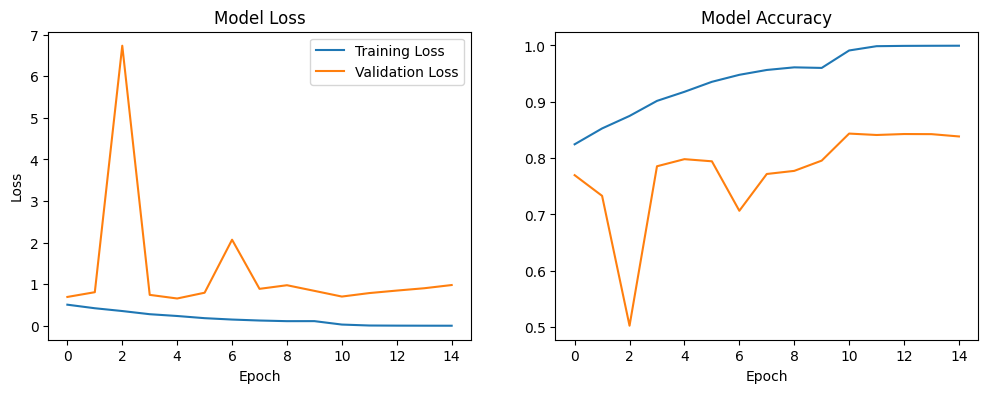

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# 콜백 정의
callbacks = [
    # 모델 체크포인트 (가장 좋은 모델 저장)
    ModelCheckpoint(
        'best_resnet50_cifar10.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    ),
    
    # 조기 종료 (성능 향상이 없을 때)
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    
    # 학습률 감소 (성능 향상이 없을 때)
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=5,
        min_lr=1e-6
    )
]

# 모델 학습
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=30,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel

313/313 [==============================] - 3s 10ms/step - loss: 0.6890 - accuracy: 0.7960

Test accuracy: 0.7960
Test loss: 0.6890
313/313 [==============================] - 3s 8ms/step


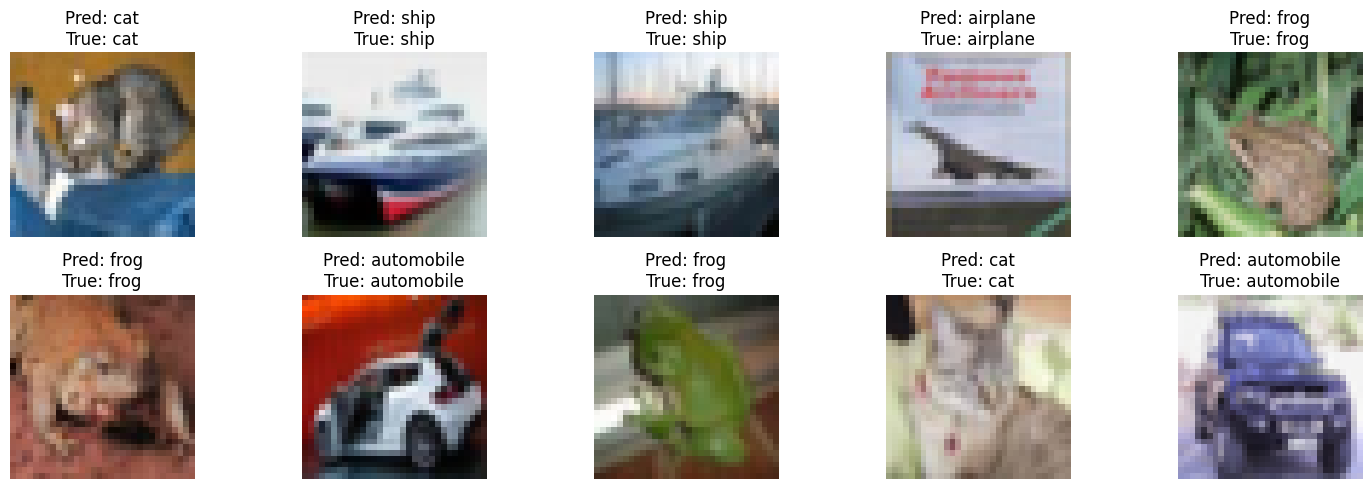

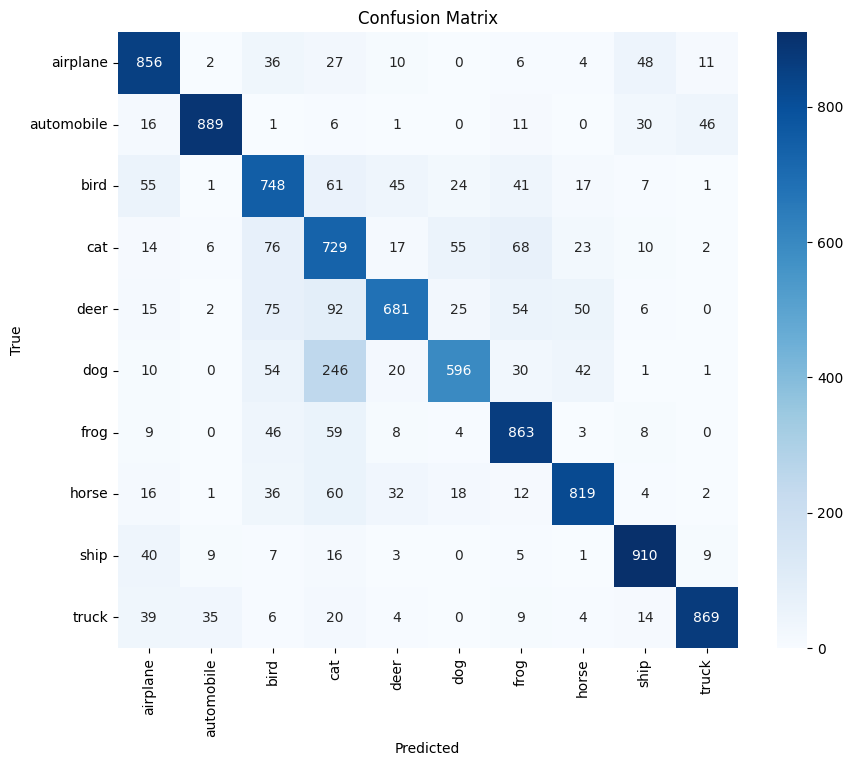

In [23]:
# 테스트 세트에 대한 예측 및 성능 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# 개별 이미지에 대한 예측 결과 시각화
predictions = model.predict(X_test)

# 랜덤하게 몇 개의 이미지 선택하여 예측 결과 시각화
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[np.argmax(y_test[i])]
    plt.title(f'Pred: {pred_label}\nTrue: {true_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 혼동 행렬 (Confusion Matrix) 생성
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

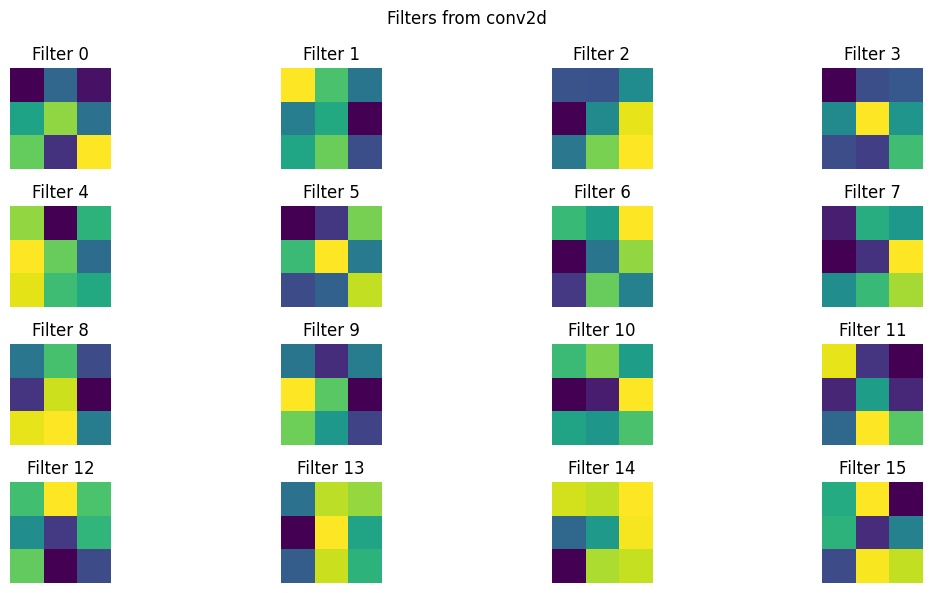

1/1 [==============================] - 0s 25ms/step


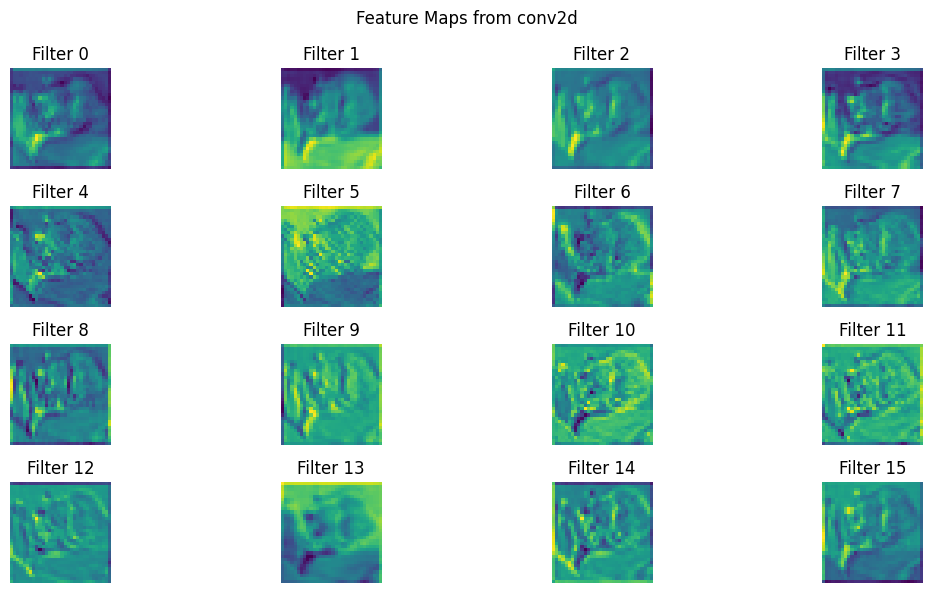

In [24]:
# 중간 레이어 활성화(특징 맵) 시각화
def visualize_feature_maps(model, image, layer_name):
    # 특정 레이어의 출력을 보기 위한 모델 생성
    layer_outputs = [layer.output for layer in model.layers if layer_name in layer.name][:1]
    activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
    
    # 이미지 하나로 활성화 얻기
    activations = activation_model.predict(image[np.newaxis, ...])
    
    # 특징 맵 시각화
    plt.figure(figsize=(12, 6))
    for i in range(min(16, activations[0].shape[-1])):  # 처음 16개 채널만
        plt.subplot(4, 4, i + 1)
        plt.imshow(activations[0][..., i], cmap='viridis')
        plt.axis('off')
        plt.title(f'Filter {i}')
    plt.suptitle(f'Feature Maps from {layer_name}')
    plt.tight_layout()
    plt.show()

# 첫 번째 컨볼루션 레이어의 필터 시각화
def visualize_filters(model, layer_name):
    # 특정 레이어 찾기
    for layer in model.layers:
        if layer_name in layer.name:
            filters = layer.get_weights()[0]
            break
    
    # 필터 정규화
    filters = (filters - filters.min()) / (filters.max() - filters.min())
    
    # 필터 시각화
    plt.figure(figsize=(12, 6))
    for i in range(min(16, filters.shape[-1])):  # 처음 16개 필터만
        plt.subplot(4, 4, i + 1)
        plt.imshow(filters[:, :, 0, i], cmap='viridis')
        plt.axis('off')
        plt.title(f'Filter {i}')
    plt.suptitle(f'Filters from {layer_name}')
    plt.tight_layout()
    plt.show()

# 시각화 실행
# 첫 번째 컨볼루션 레이어의 필터 확인
visualize_filters(model, 'conv2d')

# 특징 맵 확인 (테스트 이미지 하나 선택)
test_image = X_test[0]
visualize_feature_maps(model, test_image, 'conv2d')